In [211]:
import pandas as pd
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
seed = 42
random.seed(seed)
np.random.seed(seed)

In [212]:
def load_excel_to_dataframe(file_path):
    """
    Reads an Excel file into a Pandas DataFrame and measures the loading time.
    
    Args:
        file_path (str): The path to the Excel file.

    Returns:
        pd.DataFrame: The loaded DataFrame.
        float: The loading time in seconds.
    """
    start_time = time.time()
    df = pd.read_excel(file_path)
    end_time = time.time()
    loading_time = end_time - start_time
    return df, loading_time

In [213]:
loaded_df, loading_time = load_excel_to_dataframe("data/Online Retail.xlsx")
loaded_df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [214]:
print(f"Loading time: {loading_time} seconds")

Loading time: 32.76324939727783 seconds


### Data Exploration

In [215]:
# check shape of the dataset, (row, column)
loaded_df.shape

(541909, 8)

In [216]:
print('The Datset consists of {} features & {} samples.'.format(loaded_df.shape[1], loaded_df.shape[0]))

The Datset consists of 8 features & 541909 samples.


In [217]:
loaded_df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [218]:
# check the data type of all columns
loaded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [219]:
# Generate summary statistics of the numeric columns in the DataFrame using the Pandas describe() method.
# loaded_df.describe().transpose()
loaded_df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

In [220]:
# check missing or null value
loaded_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [221]:
def null_value_percentage(df):
    null_values = df.isna().sum() / len(df)
    percentage_null_values = null_values.apply(lambda x: f"{x:.1%}")
    return percentage_null_values

In [222]:
null_value_percentage(loaded_df)

InvoiceNo       0.0%
StockCode       0.0%
Description     0.3%
Quantity        0.0%
InvoiceDate     0.0%
UnitPrice       0.0%
CustomerID     24.9%
Country         0.0%
dtype: object

In [223]:
# handle null values
loaded_df.dropna(inplace=True)

In [224]:
null_value_percentage(loaded_df)

InvoiceNo      0.0%
StockCode      0.0%
Description    0.0%
Quantity       0.0%
InvoiceDate    0.0%
UnitPrice      0.0%
CustomerID     0.0%
Country        0.0%
dtype: object

In [225]:
loaded_df.shape

(406829, 8)

In [226]:
def conver_negative_value(x):
  if x[0]=="-":
    return float(x[1:])
  else:
    return float(x)

In [227]:
# Remove negative values in quantity
loaded_df['Quantity'] = loaded_df['Quantity'].astype(str)
loaded_df['Quantity'] = loaded_df['Quantity'].apply(conver_negative_value)

In [228]:
loaded_df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [229]:
loaded_df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       13.412279  2011-07-10 16:30:57.879207424       3.460471   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.624170                            NaN      69.315162   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

### Exploratory Data Analysis (EDA)

***Detect and resolve outliers***

<Axes: ylabel='Quantity'>

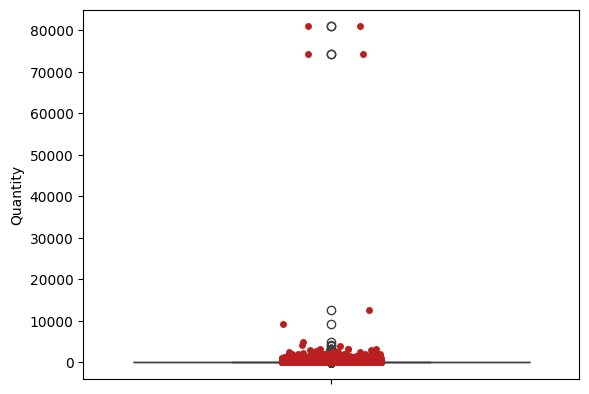

In [230]:
# Detect outlier for quantity
sns.boxplot( y='Quantity',data=loaded_df)
sns.stripplot(y='Quantity',data=loaded_df, color="#ba2020")

In [231]:
# remove outlier for quantity
outliers_index = loaded_df.loc[loaded_df['Quantity']>2000].index
loaded_df = loaded_df.drop(outliers_index)
sns.boxplot( y='Quantity',data=loaded_df)
sns.stripplot(y='Quantity',data=loaded_df, color="#ba2020")

<Axes: ylabel='Quantity'>

<Axes: ylabel='UnitPrice'>

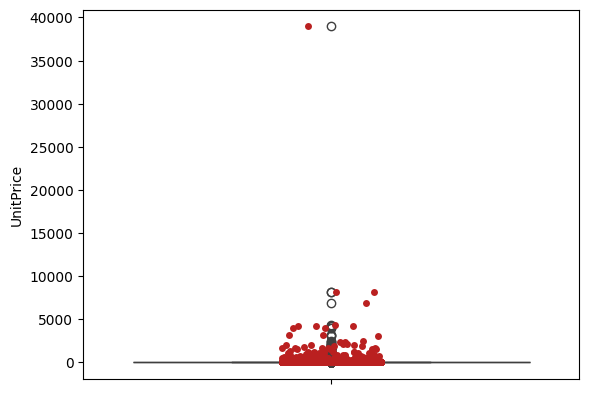

In [232]:
# Detect outlier for Unit Price
sns.boxplot( y='UnitPrice',data=loaded_df)
sns.stripplot(y='UnitPrice',data=loaded_df, color="#ba2020")

<Axes: ylabel='UnitPrice'>

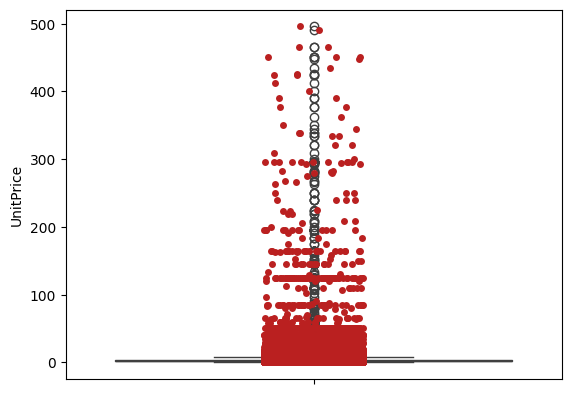

In [233]:
# Remove outlier for Unit Price
outliers_index = loaded_df.loc[loaded_df['UnitPrice']>500].index
loaded_df = loaded_df.drop(outliers_index)
sns.boxplot( y='UnitPrice',data=loaded_df)
sns.stripplot(y='UnitPrice',data=loaded_df, color="#ba2020")

<Axes: >

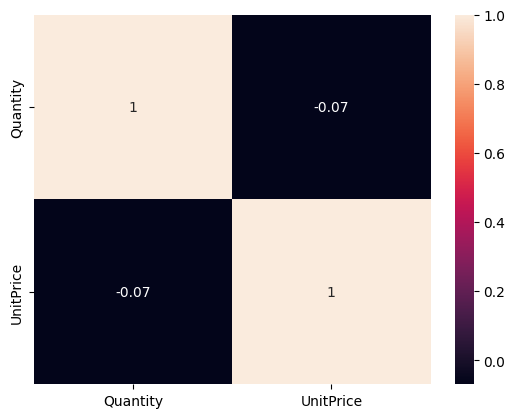

In [234]:
# Correlation matrix between the "Quantity" and "UnitPrice"
sns.heatmap(loaded_df[['Quantity', 'UnitPrice']].corr(), annot = True)

In [235]:
loaded_df[['Quantity', 'UnitPrice']].skew()

Quantity     19.146478
UnitPrice    34.236111
dtype: float64

In [236]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot the histogram for 'Quantity'
sns.histplot(data=loaded_df, x='Quantity', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Quantity')
# Plot the histogram for 'UnitPrice'
sns.histplot(data=loaded_df, x='UnitPrice', kde=True, ax=axes[1])
axes[1].set_title('Distribution of UnitPrice')
plt.show()

### Feature Engineering

In [237]:
# Convert to datetime to proper datatype
loaded_df['InvoiceDate'] = pd.to_datetime(loaded_df['InvoiceDate'],format='%d-%m-%Y %H:%M')
loaded_df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [238]:
loaded_df["InvoiceDateDay"] = loaded_df["InvoiceDate"].dt.date
loaded_df["InvoiceDateTime"] = loaded_df["InvoiceDate"].dt.time
loaded_df["InvoiceYear"] = loaded_df["InvoiceDate"].dt.year
loaded_df["InvoiceMonth"] = loaded_df["InvoiceDate"].dt.month
loaded_df["InvoiceMonthName"] = loaded_df["InvoiceDate"].dt.month_name()
loaded_df["InvoiceDay"] = loaded_df["InvoiceDate"].dt.day
loaded_df["InvoiceDayName"] = loaded_df["InvoiceDate"].dt.day_name()
loaded_df["InvoiceHour"] = loaded_df["InvoiceDate"].dt.hour
loaded_df["InvoiceDayOfWeek"] = loaded_df["InvoiceDate"].dt.day_of_week
loaded_df["InvoiceWeekOfYear"] = loaded_df["InvoiceDate"].dt.isocalendar().week

In [239]:
# New attribute: amount
loaded_df['Amount'] = loaded_df['Quantity']*loaded_df['UnitPrice']
loaded_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDateDay  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     2010-12-01   

  InvoiceDateTime  InvoiceYear  InvoiceMonth InvoiceMonthName  InvoiceDay  \
0        08:26:00         2010            12         December           1   
1        08:26:00         2010            12         December           1   
2        08:26:00         2010            12         December           1   
3        08:26:00         2010            12         December           1   
4        08:26:00         2010            12         December           1   

  InvoiceDayName  InvoiceHour  InvoiceDayOfWeek  InvoiceWeekOfYear  Amount  
0      Wednesday            8                 2                 48   15.30  
1      Wednesday            8                 2                 48   20.34  
2      Wednesday            8                 2                 48   22.00  
3      Wednesday            8                 2                 48   20.34  
4      Wednesday            8                 2                 48   20.34

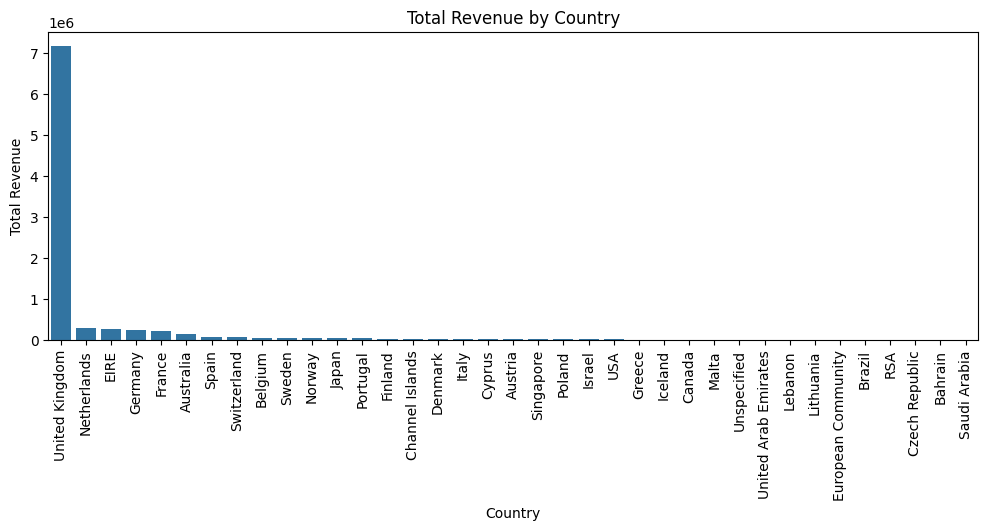

In [240]:
# Revenue by Country
country_revenue = loaded_df.groupby("Country")["Amount"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 4))
plt.title("Total Revenue by Country")
sns.barplot(data=country_revenue, x="Country", y="Amount")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.show()

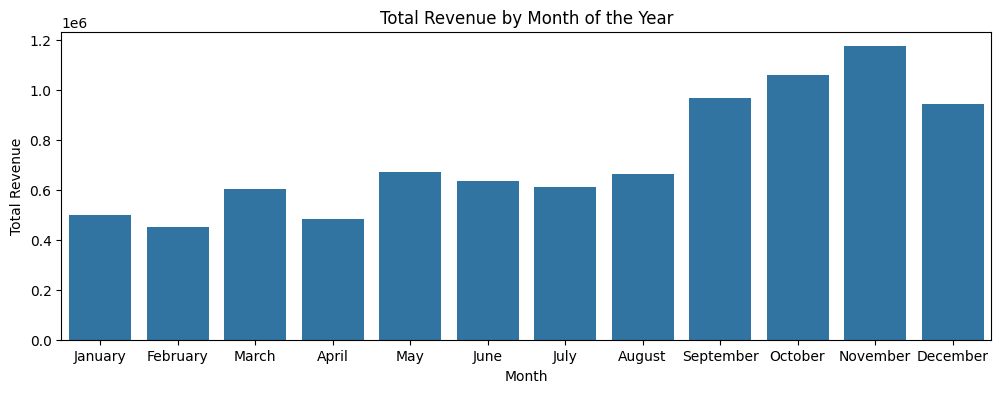

In [241]:
#  Revenue by Month of the Year
revenue_month = loaded_df.groupby(["InvoiceMonth", "InvoiceMonthName"])["Amount"].sum().reset_index()
plt.figure(figsize=(12, 4))
plt.title("Total Revenue by Month of the Year")
sns.barplot(data=revenue_month, x="InvoiceMonthName", y="Amount")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

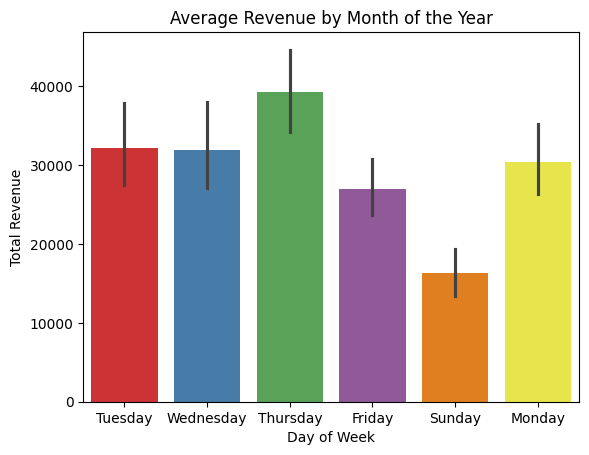

In [242]:
revenue_day = loaded_df.groupby(["InvoiceWeekOfYear", "InvoiceDayOfWeek", "InvoiceDayName"])["Amount"].sum().reset_index()
revenue_day.groupby(["InvoiceDayOfWeek", "InvoiceDayName"])["Amount"].mean().reset_index()
plt.title("Average Revenue by Month of the Year")
sns.barplot(data=revenue_day, x="InvoiceDayName", y="Amount", hue="InvoiceDayName", palette="Set1", legend=False)
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.show()

In [243]:
# Top 10 Customers by Revenue
top_10_customers = loaded_df["Amount"].sort_values(ascending=False).head(10)
top_10_customers

348325    7144.72
160143    4921.50
52709     4921.50
160542    4632.00
52772     4522.50
160141    4522.50
244419    4401.00
160544    4254.50
52134     4121.64
533812    3861.00
Name: Amount, dtype: float64

In [244]:
# Calculates the sum of the 'Amount' column for each customer. 
df_amount_customer = loaded_df.groupby('CustomerID')['Amount'].sum().reset_index()
df_amount_customer.head()

CustomerID   Amount
0     12347.0  4310.00
1     12348.0  1797.24
2     12349.0  1757.55
3     12350.0   334.40
4     12352.0  3466.67

In [245]:
# New Attribute : Frequency
# count the number of unique invoice numbers for each customer
df_unique_invoice = loaded_df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
df_unique_invoice.head()

CustomerID  InvoiceNo
0     12347.0        182
1     12348.0         31
2     12349.0         73
3     12350.0         17
4     12352.0         95

In [246]:
df_unique_invoice.columns

Index(['CustomerID', 'InvoiceNo'], dtype='object')

In [247]:
# Rename invoice colunn to Frequency
df_unique_invoice.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
df_unique_invoice.head()

CustomerID  Frequency
0     12347.0        182
1     12348.0         31
2     12349.0         73
3     12350.0         17
4     12352.0         95

In [248]:
# Merging the two dfs
merged_df = df_amount_customer.merge(df_unique_invoice, on='CustomerID')
# another way 
# merged_df = pd.merge(df_amount_customer, df_unique_invoice, on='CustomerID', how='inner')
merged_df.head()

CustomerID   Amount  Frequency
0     12347.0  4310.00        182
1     12348.0  1797.24         31
2     12349.0  1757.55         73
3     12350.0   334.40         17
4     12352.0  3466.67         95

In [249]:
# Get the maximum date to know the last transaction date in our dataset
max_date = max(loaded_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [250]:
# calculate the time difference between the maximum date in the dataset and the transaction date for each record
loaded_df['DifferenceDate'] = max_date - loaded_df['InvoiceDate']
loaded_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDateDay  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     2010-12-01   

  InvoiceDateTime  InvoiceYear  InvoiceMonth InvoiceMonthName  InvoiceDay  \
0        08:26:00         2010            12         December           1   
1        08:26:00         2010            12         December           1   
2        08:26:00         2010            12         December           1   
3        08:26:00         2010            12         December           1   
4        08:26:00         2010            12         December           1   

  InvoiceDayName  InvoiceHour  InvoiceDayOfWeek  InvoiceWeekOfYear  Amount  \
0      Wednesday            8                 2                 48   15.30   
1      Wednesday            8                 2                 48   20.34   
2      Wednesday            8                 2                 48   22.00   
3      Wednesday            8                 2                 48   20.34   
4      Wednesday            8                 2                 48   20.34   

     DifferenceDate  
0 373 days 04:24:00  
1 373 days 04:24:00  
2 373 days 04:24:00  
3 373 days 04:24:00  
4 373 days 04:24:00

In [251]:
# Get the recency of customers 
df_recent_customer = loaded_df.groupby('CustomerID')['DifferenceDate'].min().reset_index()
df_recent_customer.head()

CustomerID    DifferenceDate
0     12347.0   1 days 20:58:00
1     12348.0  74 days 23:37:00
2     12349.0  18 days 02:59:00
3     12350.0 309 days 20:49:00
4     12352.0  35 days 22:13:00

In [252]:
# Extract days only
df_recent_customer['DifferenceDate'] = df_recent_customer['DifferenceDate'].dt.days
df_recent_customer.head()

CustomerID  DifferenceDate
0     12347.0               1
1     12348.0              74
2     12349.0              18
3     12350.0             309
4     12352.0              35

In [253]:
merged_df.head()

CustomerID   Amount  Frequency
0     12347.0  4310.00        182
1     12348.0  1797.24         31
2     12349.0  1757.55         73
3     12350.0   334.40         17
4     12352.0  3466.67         95

In [254]:
# Now merging  tha dataframes for getting the final RFM dataframe
merged_final_df = merged_df.merge(df_recent_customer, on='CustomerID')
merged_final_df.rename(columns={'DifferenceDate': 'Recency'}, inplace=True)
merged_final_df.head()

CustomerID   Amount  Frequency  Recency
0     12347.0  4310.00        182        1
1     12348.0  1797.24         31       74
2     12349.0  1757.55         73       18
3     12350.0   334.40         17      309
4     12352.0  3466.67         95       35

In [255]:
merged_final_df.describe()

CustomerID         Amount    Frequency      Recency
count   4364.000000    4364.000000  4364.000000  4364.000000
mean   15301.359762    2007.692485    93.198442    91.028185
std     1721.232921    8586.165692   232.517928   100.773453
min    12347.000000       1.250000     1.000000     0.000000
25%    13815.750000     307.750000    17.000000    16.000000
50%    15302.000000     675.285000    42.000000    49.000000
75%    16778.250000    1664.602500   102.000000   142.000000
max    18287.000000  275931.020000  7983.000000   373.000000

### Data visualization

In [272]:
# Create a new DataFrame containing the selected attributes
attributes = ['Recency', 'Frequency', 'Amount']
new_df = merged_final_df[attributes]
new_df.head(3)

Recency  Frequency   Amount
0        1        182  4310.00
1       74         31  1797.24
2       18         73  1757.55

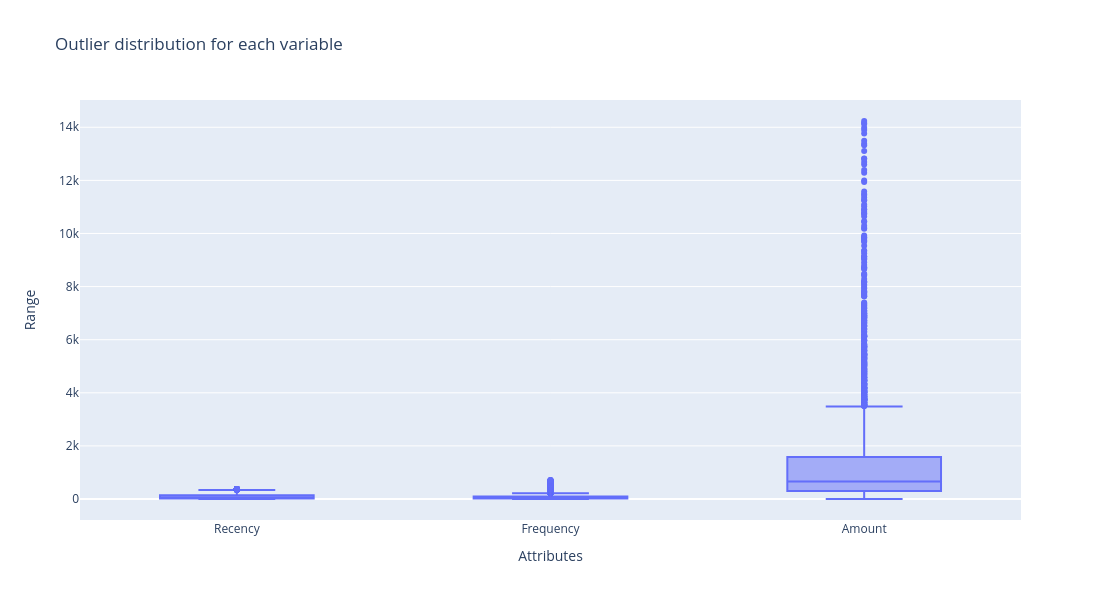

In [273]:
import plotly.express as px

# Create a box plot with Plotly
fig = px.box(new_df, y=attributes, labels={'variable': 'Attributes', 'value': 'Range'}, title="Outlier distribution for each variable")
fig.update_layout(
    xaxis=dict(title="Attributes"),
    yaxis=dict(title="Range"),
    showlegend=False,
    boxmode='group',
    width=800, height=600
)
fig.show()

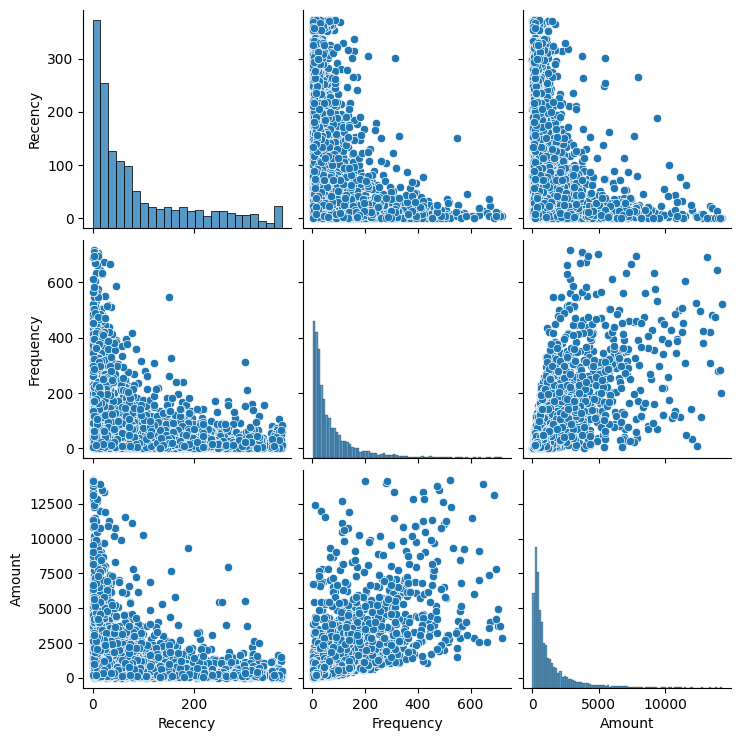

In [274]:
final_rfa_df = merged_final_df[['Recency', 'Frequency', 'Amount']]
sns.pairplot(final_rfa_df)

In [275]:
# Understanding the RFM Distribution
print('\033[1mRMF Variables Distribution'.center(100))

n=3
nf = [i for i in final_rfa_df.columns]

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    sns.distplot(final_rfa_df[nf[c]])
plt.tight_layout()
plt.show()

                                   RMF Variables Distribution                                   


/tmp/ipykernel_9309/2743152877.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_9309/2743152877.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_9309/2743152877.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code 

In [276]:
# Removing outliers for amount
Q1 = merged_final_df['Amount'].quantile(0.05) # 5% lower bound
Q3 = merged_final_df['Amount'].quantile(0.95) # 95% upperbound bound
# IQR Calculation - Statistical
IQR = Q3 - Q1
merged_final_df = merged_final_df[(merged_final_df['Amount'] >= Q1 - 1.5*IQR) & (merged_final_df['Amount'] <= Q3 + 1.5*IQR)]
merged_final_df.head()

CustomerID   Amount  Frequency  Recency
0     12347.0  4310.00        182        1
1     12348.0  1797.24         31       74
2     12349.0  1757.55         73       18
3     12350.0   334.40         17      309
4     12352.0  3466.67         95       35

In [277]:
# Removing outliers for recency
Q1 = merged_final_df['Recency'].quantile(0.05) # 5% lower bound
Q3 = merged_final_df['Recency'].quantile(0.95) # 95% upperbound bound
# IQR Calculation - Statistical
IQR = Q3 - Q1
merged_final_df = merged_final_df[(merged_final_df['Recency'] >= Q1 - 1.5*IQR) & (merged_final_df['Recency'] <= Q3 + 1.5*IQR)]
merged_final_df.head()

CustomerID   Amount  Frequency  Recency
0     12347.0  4310.00        182        1
1     12348.0  1797.24         31       74
2     12349.0  1757.55         73       18
3     12350.0   334.40         17      309
4     12352.0  3466.67         95       35

In [278]:
# Removing outliers for frequency
Q1 = merged_final_df['Frequency'].quantile(0.05) # 5% lower bound
Q3 = merged_final_df['Frequency'].quantile(0.95) # 95% upperbound bound
# IQR Calculation - Statistical
IQR = Q3 - Q1
merged_final_df = merged_final_df[(merged_final_df['Frequency'] >= Q1 - 1.5*IQR) & (merged_final_df['Frequency'] <= Q3 + 1.5*IQR)]
merged_final_df.head()

CustomerID   Amount  Frequency  Recency
0     12347.0  4310.00        182        1
1     12348.0  1797.24         31       74
2     12349.0  1757.55         73       18
3     12350.0   334.40         17      309
4     12352.0  3466.67         95       35

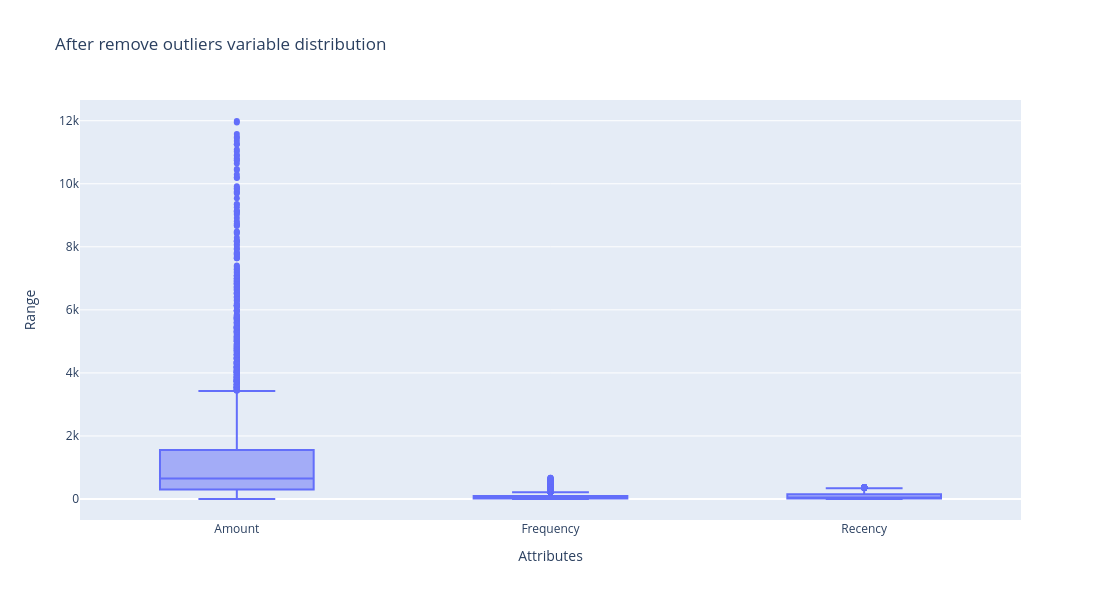

In [279]:
attributes = ['Amount', 'Frequency', 'Recency']
fig = px.box(merged_final_df, y=attributes, title="After remove outliers variable distribution", 
             labels={'variable': 'Attributes', 'value': 'Range'},
             boxmode='group', points='outliers')
fig.update_layout(
    xaxis=dict(title="Attributes", title_font=dict(size=14)),
    yaxis=dict(title="Range", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)
fig.show()

In [280]:
final_rfa_df = final_rfa_df[['Amount', 'Frequency', 'Recency']]
sns.pairplot(final_rfa_df)

                        RMF Variables Distribution After Reomve Outlier                         


/tmp/ipykernel_9309/615797827.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_9309/615797827.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_9309/615797827.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to 

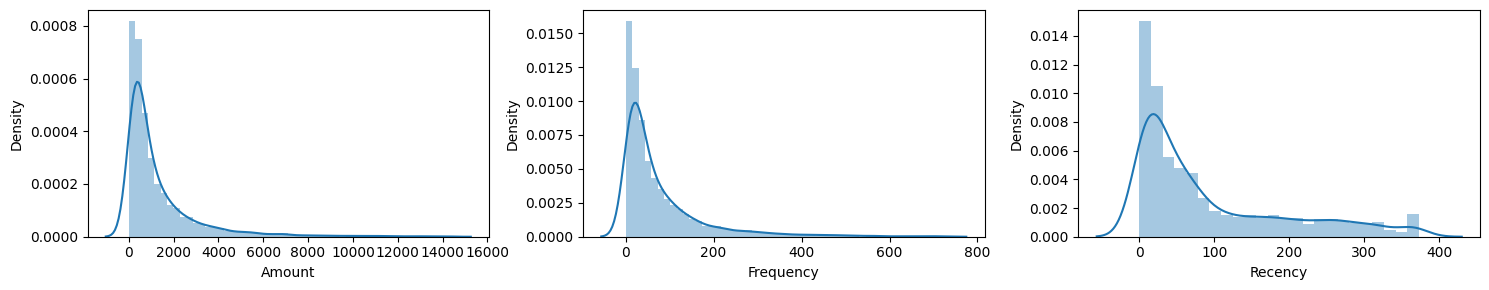

In [281]:
# Understanding the RFM Distribution After remove outlier
print('\033[1mRMF Variables Distribution After Reomve Outlier'.center(100))

n=3
nf = [i for i in final_rfa_df.columns]

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    sns.distplot(final_rfa_df[nf[c]])
plt.tight_layout()
plt.show()

### Data Manipulation

In [282]:
from sklearn.preprocessing import StandardScaler
# Applying Standardization
# Instantiate
scaler = StandardScaler()
# fit_transform
final_rfa_df_scaled = scaler.fit_transform(final_rfa_df)
final_rfa_df_scaled

array([[ 1.63776264,  1.03999936, -0.90629775],
       [ 0.25708014, -0.46480173, -0.18360926],
       [ 0.23527173, -0.04624778, -0.73800043],
       ...,
       [-0.68603861, -0.70397541,  0.86577403],
       [-0.63181705, -0.64418199, -0.8468987 ],
       [ 0.27908086, -0.07614449, -0.50040422]])

In [283]:
final_rfa_df_scaled.shape

(4284, 3)

In [284]:
final_rfa_df_scaled = pd.DataFrame(final_rfa_df_scaled)
final_rfa_df_scaled.columns = ['Recency', 'Frequency', 'Amount']
final_rfa_df_scaled.head()

Recency  Frequency    Amount
0  1.637763   1.039999 -0.906298
1  0.257080  -0.464802 -0.183609
2  0.235272  -0.046248 -0.738000
3 -0.546704  -0.604320  2.142854
4  1.174379   0.172995 -0.569703

### Building Models

***K-Means Clustering***

At n_clusters=1, the Elbow score is 12851.999999999998
At n_clusters=2, the Elbow score is 7639.0928690343835
At n_clusters=3, the Elbow score is 4417.137191613361
At n_clusters=4, the Elbow score is 3348.375254589196
At n_clusters=5, the Elbow score is 2798.1101274438643
At n_clusters=6, the Elbow score is 2389.0292146245815
At n_clusters=7, the Elbow score is 2026.434391696184
At n_clusters=8, the Elbow score is 1811.812468294655
At n_clusters=9, the Elbow score is 1636.5012948222359


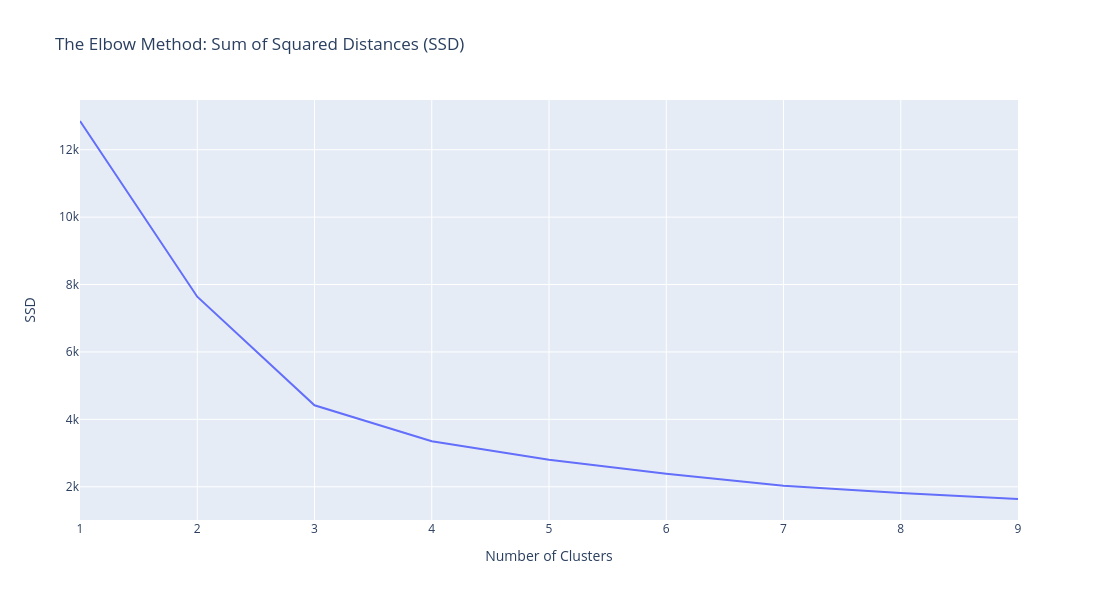

In [304]:
# Finding the optimal cluster number, we use elbow Method
from sklearn.cluster import KMeans

squared_distances = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=50, n_init=10)
    kmeans.fit(final_rfa_df_scaled)
    squared_distances[k] = kmeans.inertia_
    print("At n_clusters={0}, the Elbow score is {1}".format(k, kmeans.inertia_))

# Elbow Plot by matplotlib
# plt.title('The Elbow Method: Sum of Squared Distances')
# plt.xlabel('k')
# plt.ylabel('squared_distances')
# sns.pointplot(x=list(squared_distances.keys()), y=list(squared_distances.values()))
# plt.show()


# Elbow Plot by plotly
df = pd.DataFrame(list(squared_distances.items()), columns=['Number of Clusters', 'Sum of Squared Distances (SSD)'])
# Use Plotly Express to create the line plot
fig = px.line(df, x='Number of Clusters', y='Sum of Squared Distances (SSD)',
              title="The Elbow Method: Sum of Squared Distances (SSD)",
              labels={'Number of Clusters': 'Number of Clusters', 'Sum of Squared Distances (SSD)': 'SSD'})
fig.update_layout(
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)
fig.show()

In [306]:
model = KMeans(n_clusters=3, random_state=42, n_init=10)
model.fit(final_rfa_df_scaled)
final_rfa_df_scaled["Cluster"] = model.labels_
final_rfa_df_scaled.groupby('Cluster').agg({'Recency':'mean','Frequency':'mean','Amount':['mean', 'count']}).round(2)

Recency Frequency Amount      
           mean      mean   mean count
Cluster                               
0         -0.18     -0.18  -0.48  2724
1         -0.49     -0.52   1.55  1063
2          2.07      2.09  -0.70   497

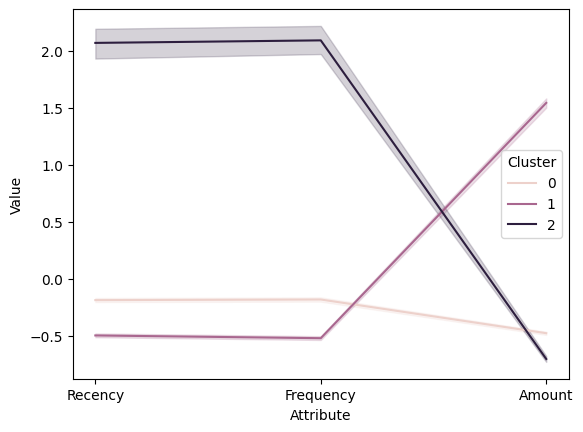

In [324]:
# print(final_rfa_df_scaled.shape)
# Visualizing the Characteristics of the Cluster Chart
final_rfa_df_normalized = pd.DataFrame(final_rfa_df_scaled, columns=['Recency', 'Frequency', 'Amount'])
final_rfa_df_normalized['ID'] = final_rfa_df_scaled.index
final_rfa_df_normalized['Cluster'] = model.labels_
df_nor_melt = pd.melt(final_rfa_df_normalized.reset_index(), id_vars=['ID', 'Cluster'], value_vars=['Recency','Frequency','Amount'], var_name='Attribute', value_name='Value')
# df_nor_melt.head()
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt)
plt.show()

### Evaluation

***Silhouette Analysis***

Formula: silhouette(i) = (b(i) - a(i)) / max(a(i), b(i))

The silhouette score ranges from -1 to 1:

A Silhouette score of 1: This represents the best scenario, where data points within a cluster are very similar to each other (high cohesion) and well-separated from data points in other clusters (high separation).

A Silhouette score close to 0: This suggests that data points within a cluster are not clearly closer to other data points in the same cluster than to data points in neighboring clusters. It could indicate overlapping clusters or poorly defined clusters.

A Silhouette score close to -1: This indicates that data points within a cluster are more similar to data points in a different cluster, suggesting that the clustering algorithm may have grouped dissimilar data points together.

In [329]:
from sklearn.metrics import silhouette_score
for k in range(2,10):
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, max_iter=50, n_init=10)
    kmeans.fit(final_rfa_df_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(final_rfa_df_scaled, cluster_labels)
    print("At n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))

At n_clusters=2, the silhouette score is 0.6083353915987305
At n_clusters=3, the silhouette score is 0.5772373902104754
At n_clusters=4, the silhouette score is 0.5765728242234182
At n_clusters=5, the silhouette score is 0.46724589405504763
At n_clusters=6, the silhouette score is 0.47077967580382607
At n_clusters=7, the silhouette score is 0.4422006560282211
At n_clusters=8, the silhouette score is 0.444370907727862
At n_clusters=9, the silhouette score is 0.368984212670578


In [334]:
final_rfa_df_scaled


Recency  Frequency    Amount  Cluster
0     1.637763   1.039999 -0.906298        2
1     0.257080  -0.464802 -0.183609        0
2     0.235272  -0.046248 -0.738000        0
3    -0.546704  -0.604320  2.142854        1
4     1.174379   0.172995 -0.569703        0
...        ...        ...       ...      ...
4279 -0.634894  -0.684044 -0.193509        0
4280 -0.631213  -0.674079  1.826059        1
4281 -0.686039  -0.703975  0.865774        1
4282 -0.631817  -0.644182 -0.846899        0
4283  0.279081  -0.076144 -0.500404        0

[4284 rows x 4 columns]

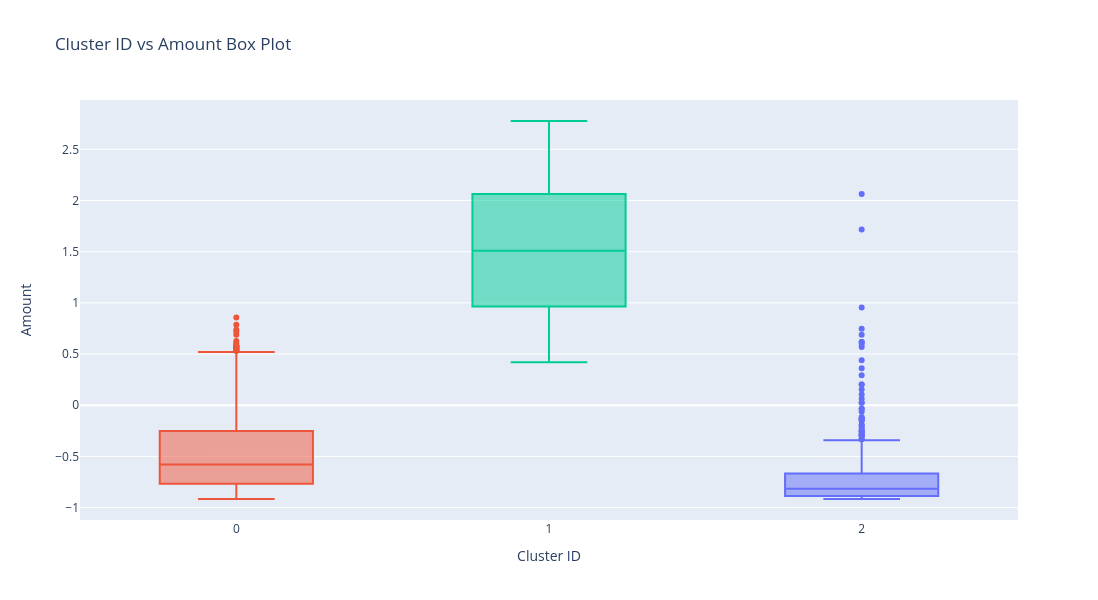

In [335]:
fig = px.box(final_rfa_df_scaled, x='Cluster', y='Amount',
             title="Cluster ID vs Amount Box Plot",
             labels={'Cluster': 'Cluster ID', 'Amount': 'Amount'},
             color='Cluster')

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

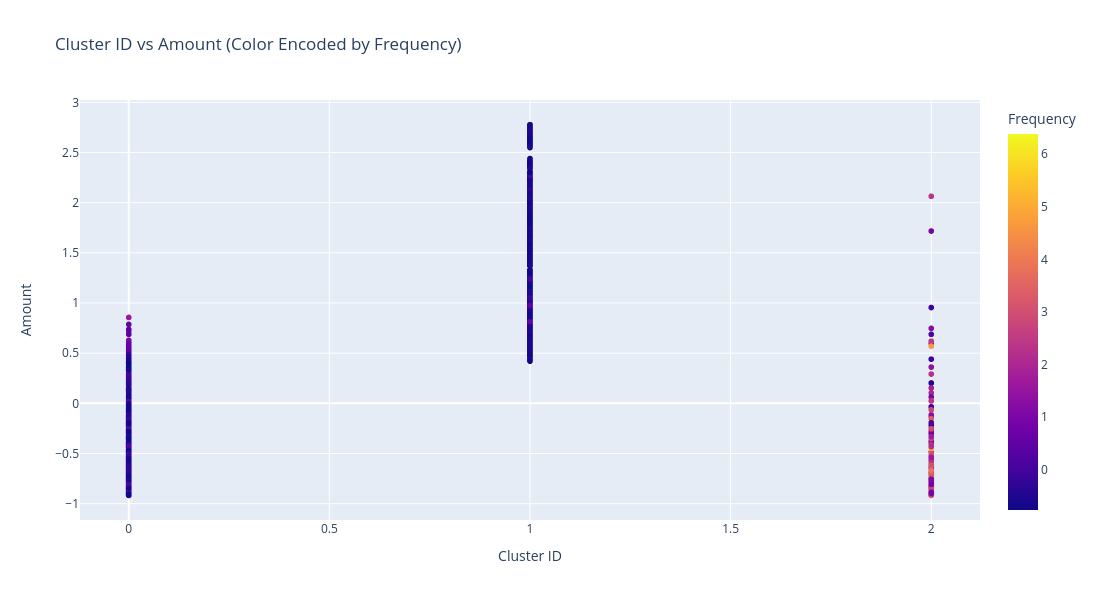

In [336]:
fig = px.scatter(final_rfa_df_scaled, x='Cluster', y='Amount', color='Frequency',
                 title='Cluster ID vs Amount (Color Encoded by Frequency)',
                 labels={'Cluster': 'Cluster ID', 'Amount': 'Amount', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=True,
    width=800,
    height=600
)
fig.show()

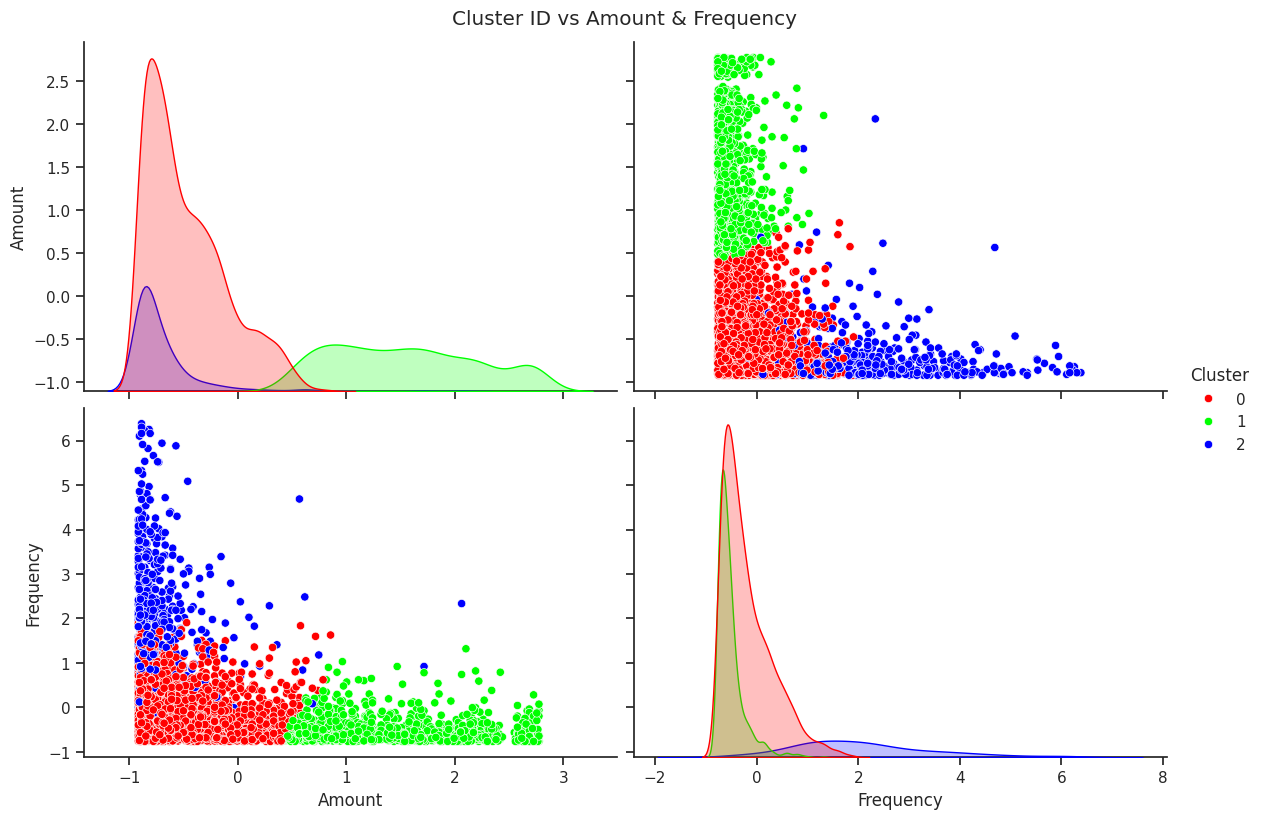

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

# Color:  Red, Green, and Blue
custom_palette = sns.color_palette(["#FF0000", "#00FF00", "#0000FF"])
sns.set(style="ticks")
sns.pairplot(final_rfa_df_scaled, hue='Cluster', vars=['Amount', 'Frequency'], palette=custom_palette, height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Frequency', y=1.02)
plt.show()

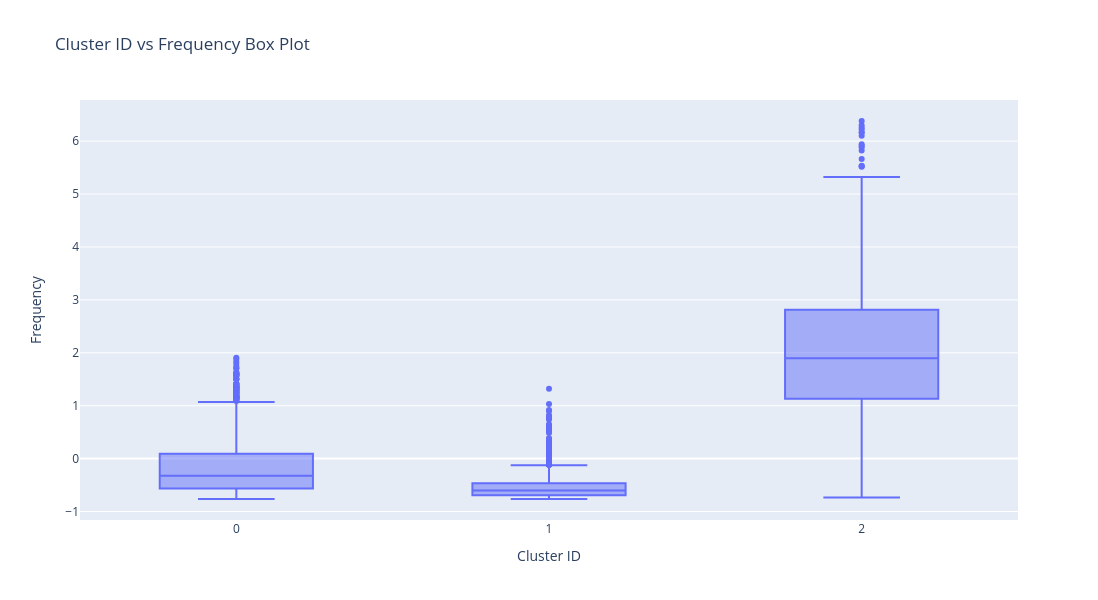

In [338]:
fig = px.box(final_rfa_df_scaled, x='Cluster', y='Frequency',
             title="Cluster ID vs Frequency Box Plot",
             labels={'Cluster': 'Cluster ID', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

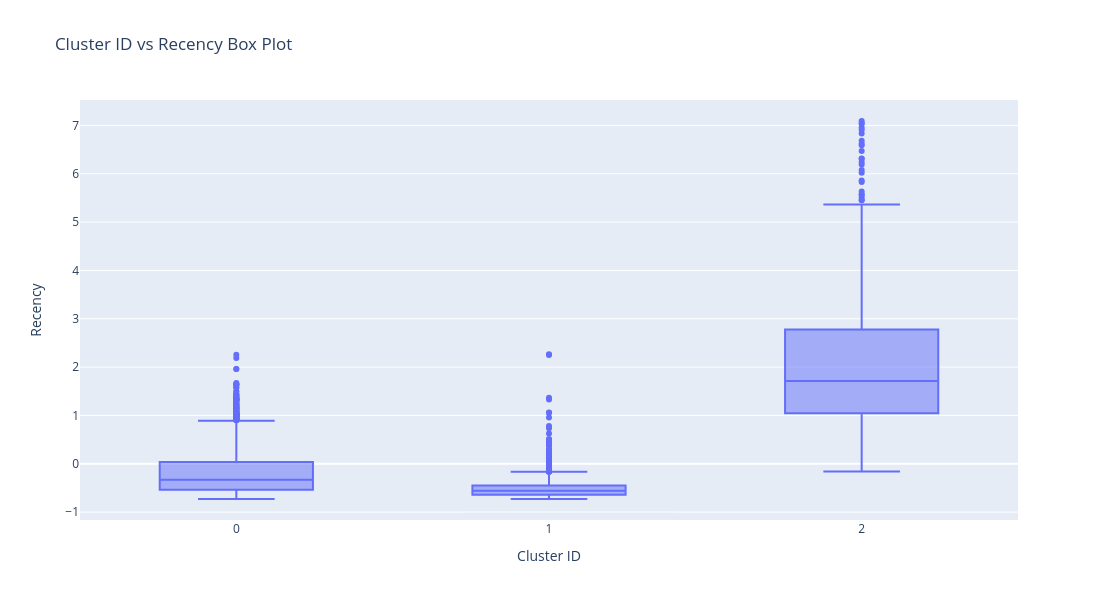

In [339]:
fig = px.box(final_rfa_df_scaled, x='Cluster', y='Recency',
             title="Cluster ID vs Recency Box Plot",
             labels={'Cluster': 'Cluster ID', 'Recency': 'Recency'})
fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Recency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)
fig.show()

/home/kazi/Works/Projects/ClusterCart/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



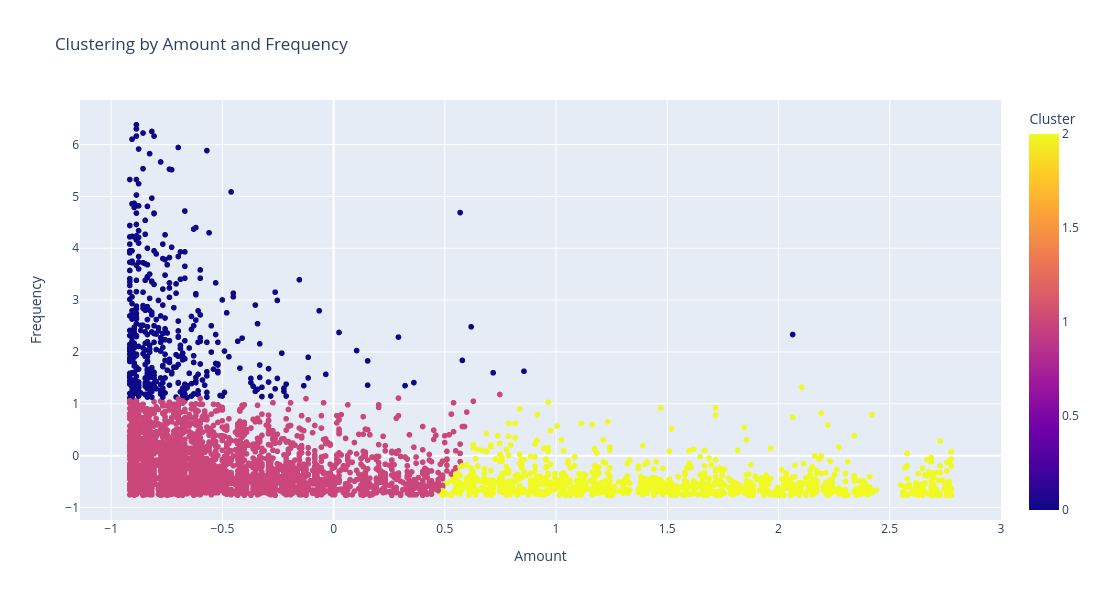

In [341]:
# Selecting the two features for clustering
data_for_clustering = final_rfa_df_scaled[['Amount', 'Frequency']]
n_clusters = 3
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
final_rfa_df_scaled['Cluster_2D'] = kmeans.fit_predict(data_for_clustering)

# Create a scatter plot with Plotly
fig = px.scatter(final_rfa_df_scaled, x='Amount', y='Frequency', color='Cluster_2D',
                 title='Clustering by Amount and Frequency',
                 labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Cluster_2D': 'Cluster'})

fig.update_layout(
    xaxis=dict(title="Amount", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    width=800,
    height=600
)

fig.show()

/home/kazi/Works/Projects/ClusterCart/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



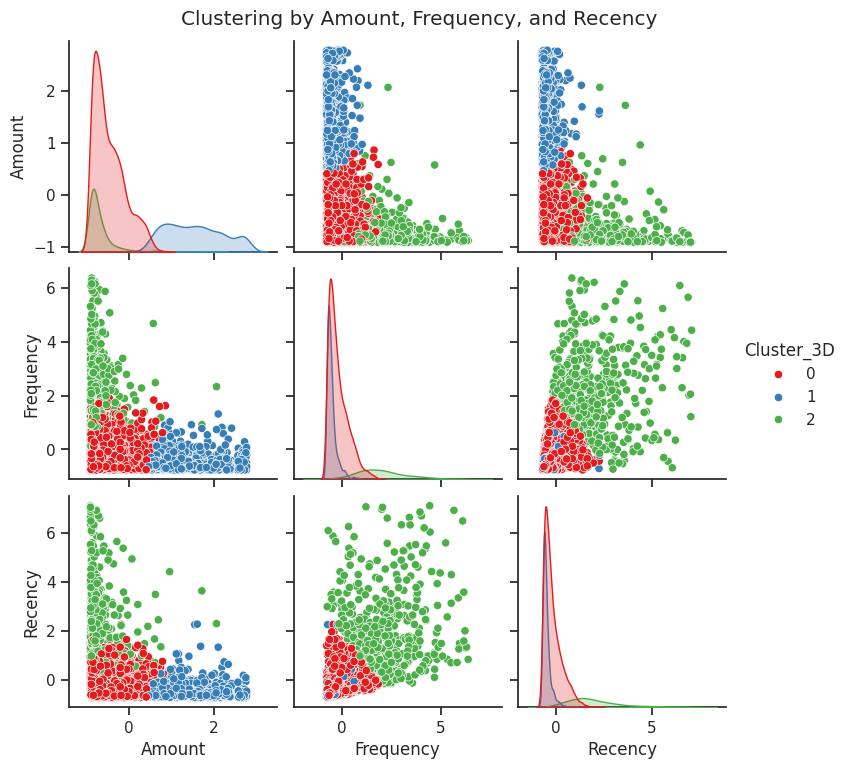

In [343]:
# Selecting the three features for clustering
data_for_clustering = final_rfa_df_scaled[['Amount', 'Frequency', 'Recency']]
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
final_rfa_df_scaled['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters (scatter plot matrix)
sns.set(style="ticks")
sns.pairplot(final_rfa_df_scaled, hue='Cluster_3D', vars=['Amount', 'Frequency', 'Recency'], palette='Set1')
plt.suptitle('Clustering by Amount, Frequency, and Recency', y=1.02)
plt.show()

In [344]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
final_rfa_df_scaled['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(final_rfa_df_scaled, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()

/home/kazi/Works/Projects/ClusterCart/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

